# <b>PyCaret Regression Example (main components)<b>
Last Update: 28/12/2022

PyCaret Version: 2.2.3

Author: [Aurimas Aleksandras Nausėdas](https://github.com/aurimas13)

# <b> Installation </b>

In [1]:
!pip install pycaret==2.2.3

In [2]:
# Check Version
from pycaret.utils import version
print('Confirm PyCaret version is 2.2.X?')
print('PyCaret Version: ', version())

Confirm PyCaret version is 2.2.X?
PyCaret Version:  2.2.3


# 1. <b>Loading Dataset<b>

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. <b>Initialize Setup<b>

In [4]:
# Import regression tools and setup an initiliziation
from pycaret.regression import *
reg1 = setup(data, target='charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


# 3. <b>Compare Baseline<b>

In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.6062,23032272.0323,4796.0417,0.8391,0.4429,0.3133,0.0240
rf,Random Forest Regressor,2773.4915,25322439.6709,5029.5502,0.8218,0.4815,0.3436,0.0880
catboost,CatBoost Regressor,2853.7795,25475537.1518,5045.7888,0.8212,0.4823,0.3492,0.2080
lightgbm,Light Gradient Boosting Machine,3018.9895,25515012.2780,5049.8492,0.8192,0.5534,0.3876,0.0260
et,Extra Trees Regressor,2779.8348,28221038.4660,5302.5710,0.8039,0.4862,0.3265,0.0760
ada,AdaBoost Regressor,4366.1001,29298215.0099,5411.0606,0.7915,0.6478,0.7662,0.0100
xgboost,Extreme Gradient Boosting,3257.2767,31489404.4000,5610.5080,0.7774,0.5723,0.4072,0.0620
llar,Lasso Least Angle Regression,4326.7373,38523203.6644,6194.6391,0.7345,0.6004,0.4409,0.5440
lr,Linear Regression,4332.7662,38549952.4000,6197.0843,0.7343,0.6369,0.4415,0.7020
lasso,Lasso Regression,4332.6331,38543896.8000,6196.6073,0.7343,0.6404,0.4416,0.5560


# 4. <b>Create Model<b>

In [6]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9328,24058897.6188,4904.9870,0.8563,0.6083,0.3985
1,3080.5341,29299757.4511,5412.9250,0.8296,0.4459,0.3268
2,3022.2314,27624562.3462,5255.9074,0.6502,0.6822,0.4361
3,3146.2421,25018957.3381,5001.8954,0.7911,0.6398,0.5095
4,3154.6899,28894513.1127,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,21432485.9043,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,20785815.6794,4559.1464,0.8586,0.3891,0.3070
7,2678.3617,24232738.8679,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,21418666.0615,4628.0305,0.8617,0.5574,0.4101
9,3273.2286,29598376.0758,5440.4390,0.8094,0.5916,0.3804



In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [7]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate=i) for i in np.arange(0.1, 1, 0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4208.4914,37359346.2148,6112.2292,0.7769,0.6969,0.5903
1,4164.7621,38772692.6839,6226.7723,0.7746,0.6826,0.4917
2,4545.7489,45041923.2265,6711.3280,0.4297,0.9558,0.6772
3,4390.3369,41942309.5563,6476.2883,0.6498,0.7140,0.7225
4,4612.6274,41966536.7333,6478.1584,0.6879,0.6953,0.5762
5,4166.0224,34525506.1381,5875.8409,0.7779,0.6199,0.4641
6,3916.8457,31704831.4864,5630.7044,0.7843,0.7189,0.4801
7,3689.6088,32718648.7731,5720.0217,0.8201,0.6266,0.4303
8,3995.6685,35808315.7293,5984.0050,0.7687,0.9064,0.6267
9,4616.1772,47556279.2449,6896.1061,0.6937,0.8657,0.7124


In [8]:
len(lgbms)

9

# 5. <b>Tune Hyperparameters<b>

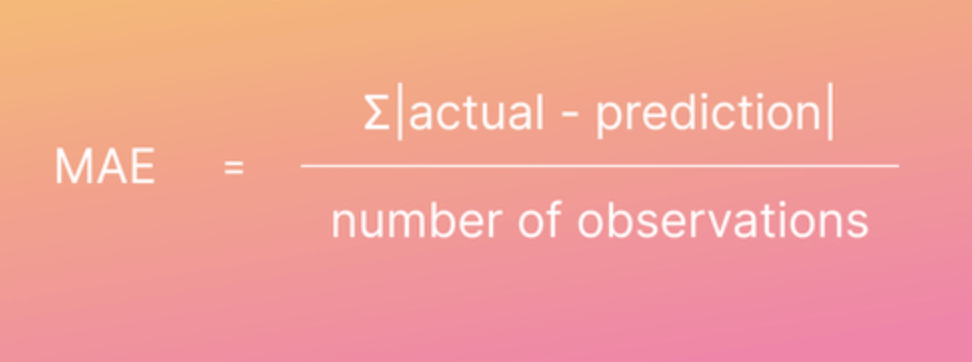

In [9]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2714.5960,20082330.5110,4481.3313,0.8801,0.4411,0.3227
1,3233.9862,30452696.2798,5518.3962,0.8229,0.4384,0.3285
2,2766.0996,23040274.6658,4800.0286,0.7083,0.5137,0.3772
3,2912.7110,21424774.1632,4628.6903,0.8211,0.4989,0.4006
4,2939.5090,27487022.0665,5242.8067,0.7956,0.5281,0.2782
5,2602.4025,18404080.3029,4289.9977,0.8816,0.3452,0.2547
6,2479.0161,18989864.9116,4357.7362,0.8708,0.4170,0.3010
7,2653.7925,24093380.4885,4908.5008,0.8675,0.4552,0.2600
8,2534.8309,19203456.1091,4382.1748,0.8760,0.4255,0.3494
9,2984.0451,26976573.0984,5193.8977,0.8262,0.4923,0.3430


In [10]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.134, max_depth=-1,
              min_child_samples=45, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=70, n_jobs=-1, num_leaves=90, objective=None,
              random_state=123, reg_alpha=0.1, reg_lambda=0.001, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. <b>Ensemble Model<b>

In [11]:
# gbr = create_model('gbr')
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2862.7040,32594527.6962,5709.1617,0.8053,0.5001,0.3189
1,3213.4800,46766697.5226,6838.6181,0.7281,0.5483,0.3138
2,3358.0912,47276424.0005,6875.7853,0.4014,0.6403,0.4507
3,2598.4977,33324847.6468,5772.7678,0.7217,0.4949,0.2977
4,4257.3907,67586324.3678,8221.0902,0.4973,0.7013,0.6052
5,3525.8700,44405489.2005,6663.7444,0.7144,0.4926,0.3367
6,2926.8113,44171238.0392,6646.1446,0.6994,0.3859,0.2262
7,2649.0367,33512969.9264,5789.0388,0.8157,0.4710,0.1812
8,3111.4079,43406571.9269,6588.3664,0.7196,0.5288,0.4670
9,3502.5585,50498277.1684,7106.2140,0.6747,0.5453,0.3253


In [12]:
# bagged_gbr = ensemble_model(gbr, n_estimators=50)
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2698.3041,22615981.5645,4755.6263,0.8649,0.4739,0.3445
1,2810.4536,30780855.3493,5548.0497,0.8210,0.4642,0.2747
2,2859.0850,24981945.8936,4998.1943,0.6837,0.5565,0.4077
3,2856.6497,24873210.2400,4987.3049,0.7923,0.5306,0.4284
4,3065.4143,30958681.1520,5564.0526,0.7697,0.5638,0.3799
5,2808.2265,22658286.3750,4760.0721,0.8542,0.3652,0.2616
6,2595.6968,22398905.3203,4732.7482,0.8476,0.3764,0.2935
7,2653.2661,24702823.2045,4970.1935,0.8642,0.4400,0.2449
8,2302.9758,18228696.0748,4269.5077,0.8823,0.4311,0.3476
9,2868.5718,29495728.8983,5430.9970,0.8100,0.5128,0.3558


In [13]:
# boosted_gbr = ensemble_model(gbr, method = 'Boosting')
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2288.3766,25929228.2882,5092.0750,0.8451,0.4515,0.2383
1,2523.3060,33486333.9501,5786.7378,0.8053,0.4943,0.2510
2,2357.6174,29170598.3378,5400.9812,0.6307,0.5662,0.3198
3,2231.7413,25576930.7616,5057.3640,0.7864,0.4157,0.2316
4,2869.0784,40235719.7417,6343.1632,0.7007,0.6011,0.3771
5,2993.8034,34468422.4150,5870.9814,0.7783,0.4543,0.2478
6,2013.5214,26997163.9313,5195.8795,0.8163,0.3537,0.1782
7,2137.8402,26296122.7178,5127.9745,0.8554,0.4673,0.1871
8,1729.6879,17159175.5383,4142.3635,0.8892,0.3364,0.2119
9,2624.8518,36802511.0549,6066.5073,0.7630,0.5147,0.2477


# 7. <b>Blend Models<b>

In [14]:
blender = blend_models(estimator_list = compare_models(n_select=5, fold=5, include=models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2637.5416,21744997.5304,4663.1532,0.8701,0.4707,0.3221
1,2867.3880,30172229.5929,5492.9254,0.8246,0.4436,0.2817
2,2641.3353,22555582.5100,4749.2718,0.7144,0.5443,0.3962
3,2748.9046,21332401.4661,4618.7013,0.8219,0.4929,0.3856
4,2992.5093,29454763.8262,5427.2243,0.7809,0.5501,0.3568
5,2725.6152,20957953.2327,4577.9857,0.8652,0.3683,0.2590
6,2402.9281,19908169.8595,4461.8572,0.8645,0.3587,0.2709
7,2597.9454,23114808.6302,4807.7863,0.8729,0.4016,0.2258
8,2327.0499,18461508.0988,4296.6857,0.8808,0.4213,0.3398
9,2954.5035,28390819.5913,5328.3036,0.8171,0.5245,0.3704


# 8. <b>Stack Models<b>

In [15]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold=5, include = models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2638.3955,20361621.3030,4512.3853,0.8784,0.4359,0.3097
1,2921.2243,30859749.3932,5555.1552,0.8206,0.4766,0.2839
2,2576.7561,22628198.8248,4756.9106,0.7135,0.5014,0.3002
3,2791.2699,21324164.2249,4617.8095,0.8219,0.4378,0.3374
4,2941.6530,27998995.8494,5291.4077,0.7918,0.5298,0.3395
5,2663.8309,19836728.7820,4453.8443,0.8724,0.5872,0.2684
6,2440.5012,19902099.0010,4461.1769,0.8646,0.3414,0.2596
7,2721.0909,24323285.1879,4931.8643,0.8663,0.4186,0.2490
8,2297.0503,16870384.1157,4107.3573,0.8910,0.3854,0.3051
9,3033.0205,27509169.8145,5244.9185,0.8228,0.5265,0.3646


In [ ]:
compare_models()

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:11:44
Status,. . . . . . . . . . . . . . . . . .,Creating Logs
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2707.6623,23281021.7989,4805.2640,0.8345,0.4406,0.3127,0.0170
rf,Random Forest Regressor,2748.7705,25058324.2434,4990.5827,0.8199,0.4684,0.3308,0.0640
catboost,CatBoost Regressor,2865.4462,25334554.7726,5017.8574,0.8193,0.4774,0.3419,0.1230
lightgbm,Light Gradient Boosting Machine,2959.5584,25236477.0456,5013.0892,0.8171,0.5427,0.3685,0.0120
ada,AdaBoost Regressor,4162.2323,28328260.0955,5316.6146,0.7985,0.6349,0.7263,0.0080
et,Extra Trees Regressor,2805.9612,28735821.1695,5333.4655,0.7972,0.4901,0.3356,0.0520
xgboost,Extreme Gradient Boosting,3302.3215,31739266.6000,5615.5941,0.7701,0.5661,0.4218,0.0270
llar,Lasso Least Angle Regression,4315.7903,38355971.7399,6173.8735,0.7311,0.6105,0.4415,0.0060
ridge,Ridge Regression,4336.2303,38381492.6000,6175.9537,0.7309,0.6193,0.4454,0.0050
lr,Linear Regression,4323.6132,38380059.8000,6175.7164,0.7308,0.6175,0.4432,0.0060


/Users/aurimasnausedas/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/aurimasnausedas/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/aurimasnausedas/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/aurimasnausedas/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/aurim

# 9. Analyze Model

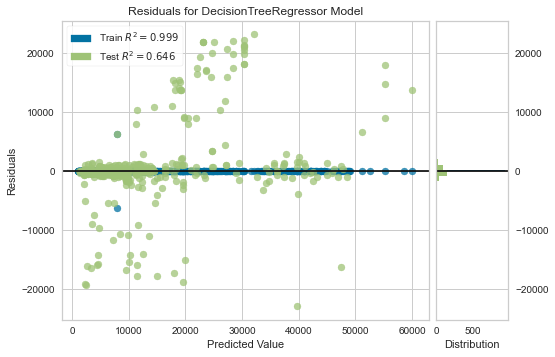

In [16]:
plot_model(dt)

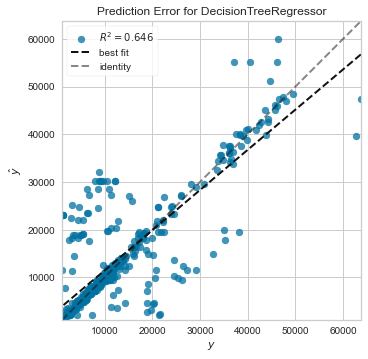

In [17]:
plot_model(dt, plot = 'error')

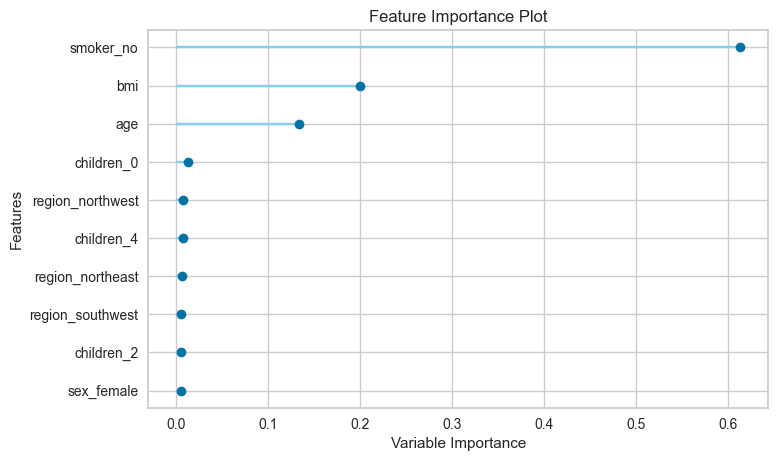

In [18]:
plot_model(dt, plot='feature')

In [19]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. <b>Interpret Model<b>

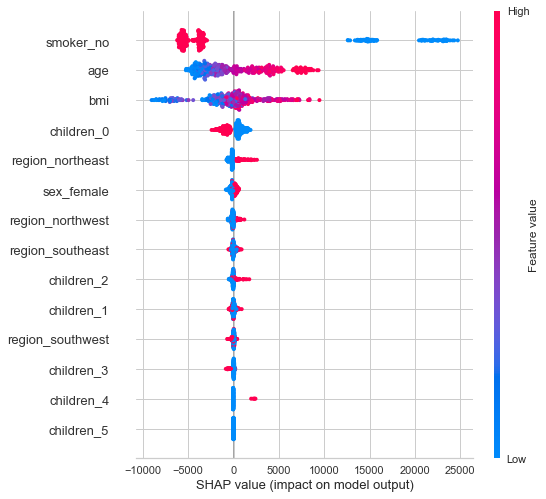

In [20]:
interpret_model(lightgbm)

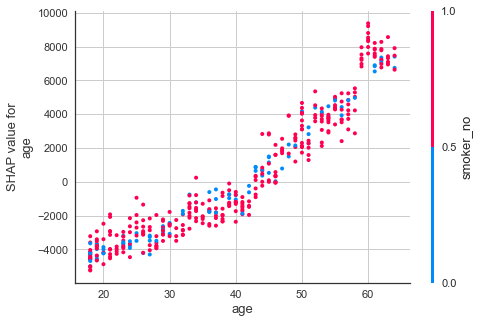

In [21]:
interpret_model(lightgbm, plot = 'correlation')

In [22]:
interpret_model(lightgbm, plot = 'reason', observation=12)

# 11. <b>AutoML()<b>

## Overview of what AutoML() does
There are two types of parameters where hyperparameters are set by the user before starting training and the autoML() chooses not only the best model but also updates model parameters that are learned during the model training.

In [23]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12.<b> Predict Model<b>

In [24]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts_best = predict_model(best)
pred_holdouts.head()
pred_holdouts_best.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,20686826.5633,4548.2773,0.8552,0.5223,0.3678


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1882.5721,20039287.1353,4476.5262,0.8597,0.3863,0.1905


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9800.888672,10977.206055
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4667.607422,6334.343750
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34838.871094,34672.148438
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5125.215820,5116.500488
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12142.578125,27000.984375


In [25]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()
# data.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,16884.923828
1,18,male,33.770,1,no,southeast,1725.552246
2,28,male,33.000,3,no,southeast,3847.674072
3,33,male,22.705,0,no,northwest,21984.470703
4,32,male,28.880,0,no,northwest,3866.855225


# 13. <b>Save / Load Model<b>

In [26]:
save_model(best, model_name='dt_model_28122022')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                         criterion='mse',
                                                                         max_depth=None,
                                              

In [27]:
loaded_bestmodel = load_model('dt_model_28122022')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                        criterion='mse',
                                                                        max_depth=None,
       

# 14. <b>Evaluate Model<b>


In [28]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…